In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=column_names)
print("Osnovni informacii")
print(data.info())
print(data.head(10))

Osnovni informacii
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
5  vhigh  vhigh     2       2      med   high  unacc
6  vhigh  vhigh     2       2      big    low  unacc
7  vhigh  vhigh     2       2      big    med  unacc
8  vhigh  

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


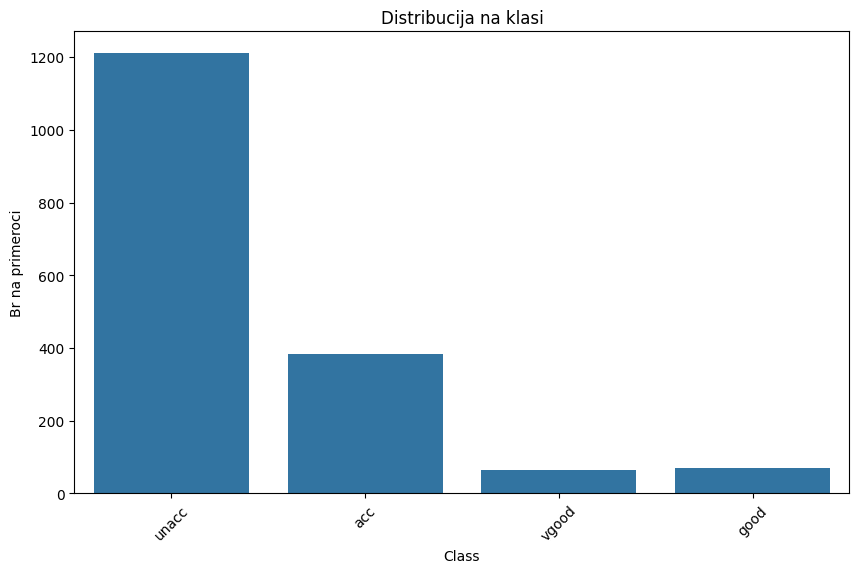

In [5]:
#DISTRIBUCIJA NA KLASITE
print(data['class'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=data)
plt.title('Distribucija na klasi')
plt.xlabel('Class')
plt.ylabel('Br na primeroci')
plt.xticks(rotation=45)
plt.show()


In [6]:
#2.PRETPROCESIRANJE
print(data.isnull().sum())

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


primenuvame label encoding za sekoj kategoriski atribut, sekoja tekstualna vrednost ja zamenuvame so celobrojna

In [7]:
label_encoders = {}
X_encoded = data.copy()

for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        le = LabelEncoder()
        X_encoded[column] = le.fit_transform(X_encoded[column])
        label_encoders[column] = le

X = X_encoded.drop('class', axis=1)
y = X_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Dimenzii na trening podatocite:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nDimenzii na test podatocite:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


Dimenzii na trening podatocite:
X_train: (1209, 6)
y_train: (1209,)

Dimenzii na test podatocite:
X_test: (519, 6)
y_test: (519,)


DECISION TREE
trenirame osnoven decision tree model. pravime evaluacija na modelot. na confusion matricata na dijagonalata mozhe da se vidat tochno predvidenite podatoci, ostanatite kvadrati se greshki.

Резултати од основниот Decision Tree модел:
Accuracy: 0.9788

Класификациски извештај:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.91      1.00      0.95        21
           2       1.00      0.98      0.99       363
           3       1.00      0.95      0.97        20

    accuracy                           0.98       519
   macro avg       0.96      0.98      0.97       519
weighted avg       0.98      0.98      0.98       519



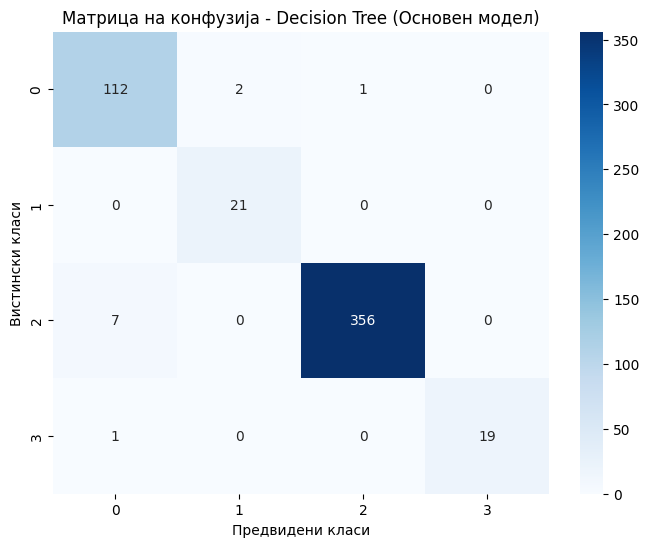

In [23]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Резултати од основниот Decision Tree модел:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nКласификациски извештај:")
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица на конфузија - Decision Tree (Основен модел)')
plt.xlabel('Предвидени класи')
plt.ylabel('Вистински класи')
plt.show()

za da se vidi dali mozhe da se optimizira modelot, se koristi Grid search so 5-fold cross-validation.

In [24]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20], #kolku dlaboko mozhi da odi drvoto, null znachi bez limit
    'min_samples_split': [2, 5, 10], # min br na primeroci za da se podeli jazelot
    'criterion': ['gini', 'entropy']#funkc za merenje na kvalitet na podelbata
}

grid_dt = GridSearchCV(#ovaa funkcija kje gi testira site kombinacii na param_grid_dt
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5, #ovde se koristi 5 kratna kros validacija
    scoring='accuracy',#merenje na performansi bazirano na tochnost
    n_jobs=-1#pobrzo treniranje
)

grid_dt.fit(X_train, y_train)

print("Најдобри параметри за Decision Tree:")
print(grid_dt.best_params_)
print(f"Најдобра accuracy: {grid_dt.best_score_:.4f}")

#se izbira modelot so najdobri parametri
best_dt_model = grid_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

print("\nРезултати од оптимизираниот Decision Tree модел:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt):.4f}")
print("\nКласификациски извештај:")
print(classification_report(y_test, y_pred_best_dt))

Најдобри параметри за Decision Tree:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Најдобра accuracy: 0.9727

Резултати од оптимизираниот Decision Tree модел:
Accuracy: 0.9750

Класификациски извештај:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.88      1.00      0.93        21
           2       1.00      0.98      0.99       363
           3       1.00      0.85      0.92        20

    accuracy                           0.97       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.98      0.97      0.98       519



In [25]:
#modelot so najdobri parametri
best_dt_model = grid_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

print("\nРезултати од оптимизираниот Decision Tree модел:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt):.4f}")
print("\nКласификациски извештај:")
print(classification_report(y_test, y_pred_best_dt))



Резултати од оптимизираниот Decision Tree модел:
Accuracy: 0.9750

Класификациски извештај:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.88      1.00      0.93        21
           2       1.00      0.98      0.99       363
           3       1.00      0.85      0.92        20

    accuracy                           0.97       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.98      0.97      0.98       519



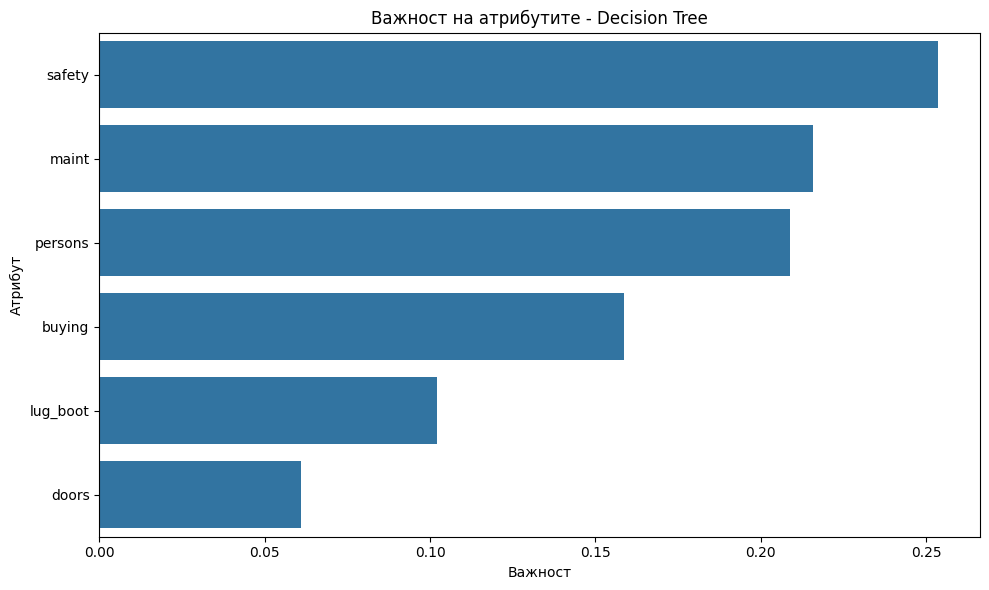

In [ ]:
#vizuelizacija navazhnost na sekoj atribut
feature_importance = pd.DataFrame(
    {'feature': X.columns, 'importance': best_dt_model.feature_importances_}
).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Важност на атрибутите - Decision Tree')
plt.xlabel('Важност')
plt.ylabel('Атрибут')
plt.tight_layout()
plt.show()


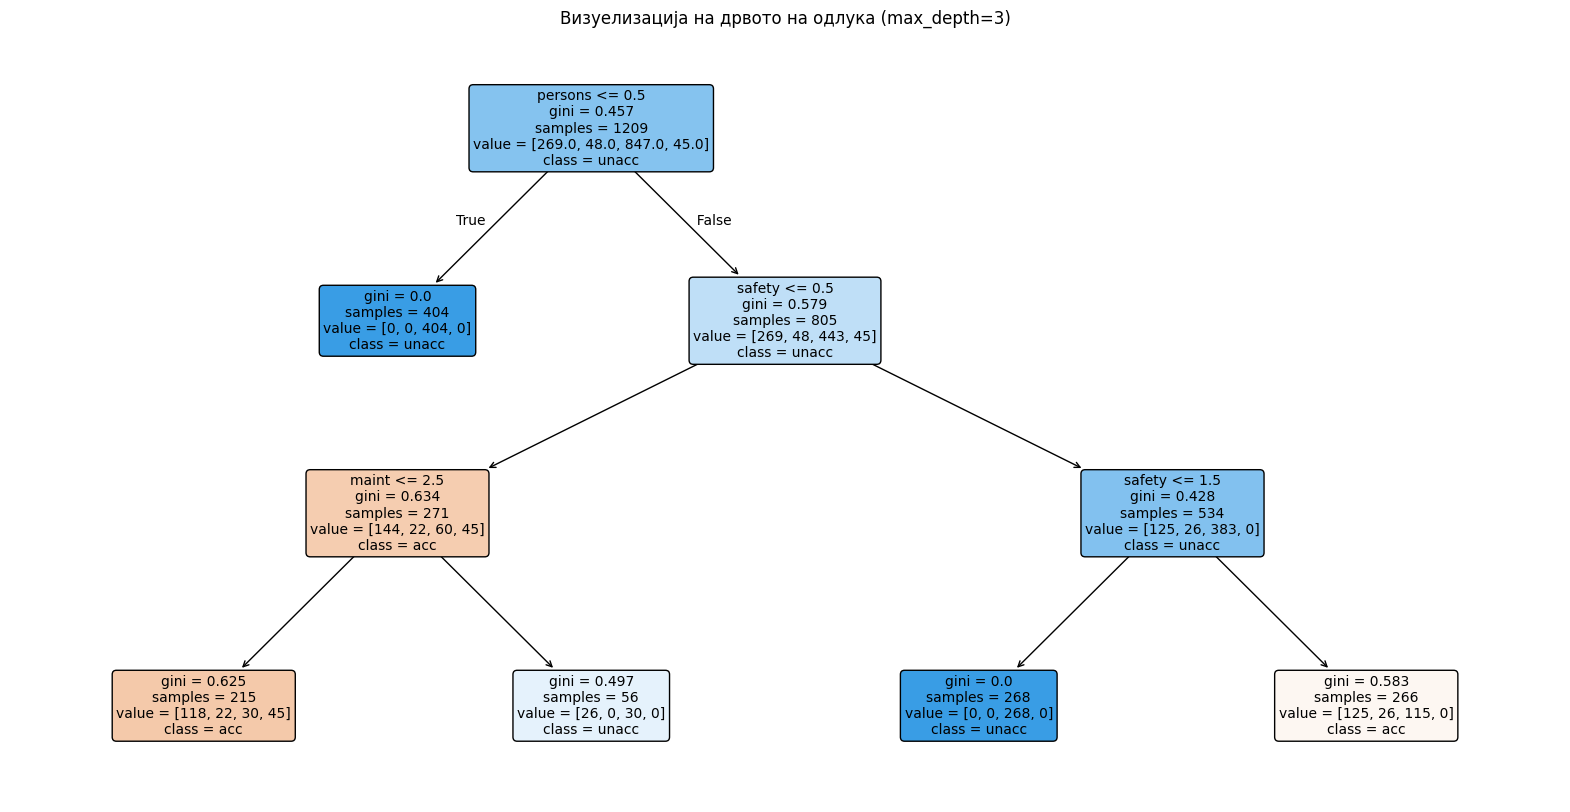

In [26]:
#drvoto na odluka ogranicheno na 3
visualizable_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
visualizable_dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(visualizable_dt, 
          feature_names=X.columns, 
          class_names=label_encoders['class'].classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Визуелизација на дрвото на одлука (max_depth=3)')
plt.show()

RANDOM FOREST

In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#evaluacija
y_pred_rf = rf_model.predict(X_test)
print("Резултати од основниот Random Forest модел:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nКласификациски извештај:")
print(classification_report(y_test, y_pred_rf))

Резултати од основниот Random Forest модел:
Accuracy: 0.9653

Класификациски извештај:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       115
           1       0.90      0.90      0.90        21
           2       0.98      0.98      0.98       363
           3       1.00      0.95      0.97        20

    accuracy                           0.97       519
   macro avg       0.95      0.94      0.95       519
weighted avg       0.97      0.97      0.97       519



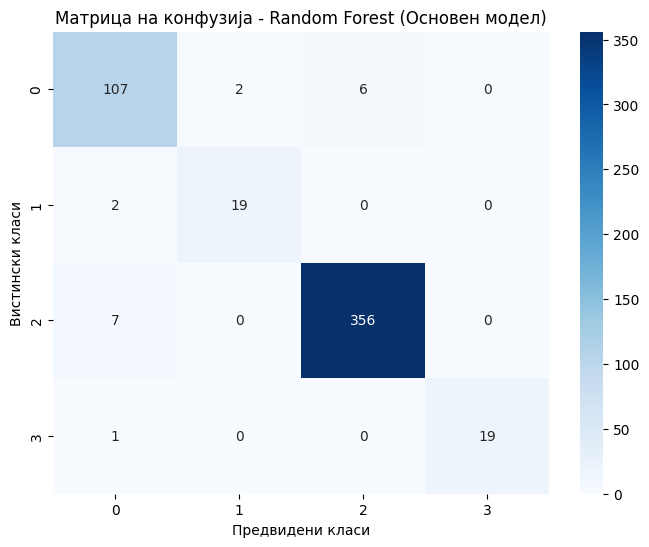

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица на конфузија - Random Forest (Основен модел)')
plt.xlabel('Предвидени класи')
plt.ylabel('Вистински класи')
plt.show()

In [30]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],#broj na drvja  vo shuma(kolku povekje drvja tolku pokompleksen model, i pobaven)
    'max_features': ['sqrt', 'log2', None],#br karakteristiki, sqrt standard za klasifikacija, kvadraten koren od vk br karakteristiki, none koristi gi site
    'bootstrap': [True, False]#kombinacija dali da se koristi boot ili ne
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Најдобри параметри за Random Forest:")
print(grid_rf.best_params_)
print(f"Најдобра accuracy: {grid_rf.best_score_:.4f}")


Најдобри параметри за Random Forest:
{'bootstrap': True, 'max_features': None, 'n_estimators': 200}
Најдобра accuracy: 0.9727


In [31]:
#modelot so najdobri param
best_rf_model = grid_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print("\nРезултати од оптимизираниот Random Forest модел:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print("\nКласификациски извештај:")
print(classification_report(y_test, y_pred_best_rf))



Резултати од оптимизираниот Random Forest модел:
Accuracy: 0.9788

Класификациски извештај:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.91      1.00      0.95        21
           2       0.99      0.99      0.99       363
           3       1.00      0.90      0.95        20

    accuracy                           0.98       519
   macro avg       0.96      0.96      0.96       519
weighted avg       0.98      0.98      0.98       519



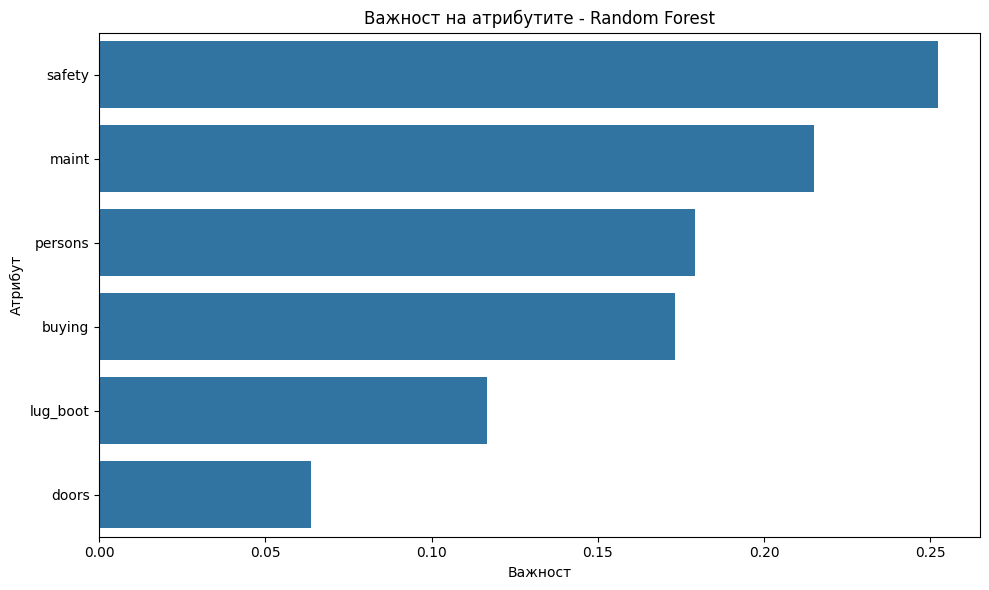

In [32]:
#vazhnost na atributite
feature_importance_rf = pd.DataFrame(
    {'feature': X.columns, 'importance': best_rf_model.feature_importances_}
).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_rf)
plt.title('Важност на атрибутите - Random Forest')
plt.xlabel('Важност')
plt.ylabel('Атрибут')
plt.tight_layout()
plt.show()

NEURAL NETWORK

In [17]:
nn_model = MLPClassifier(random_state=42, max_iter=790)#so 500 ne kovregirashe
nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)
print("Резултати од основниот Neural Network модел:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print("\nКласификациски извештај:")
print(classification_report(y_test, y_pred_nn))

Резултати од основниот Neural Network модел:
Accuracy: 0.9576

Класификациски извештај:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       115
           1       0.95      0.95      0.95        21
           2       0.98      0.96      0.97       363
           3       1.00      0.95      0.97        20

    accuracy                           0.96       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.96      0.96      0.96       519



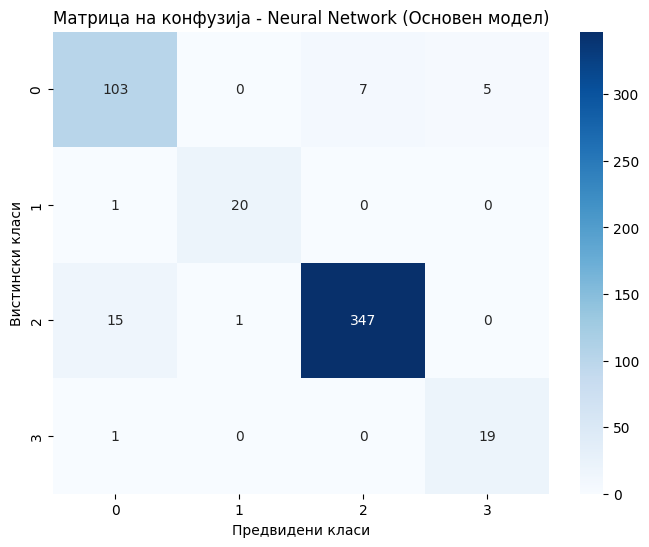

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица на конфузија - Neural Network (Основен модел)')
plt.xlabel('Предвидени класи')
plt.ylabel('Вистински класи')
plt.show()

In [18]:
param_grid_nn = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50)],#br i struktura na skrienite sloevi, pr 1 sloj so po 10 nevroni, ili 2 sloja so po 10 nevroni (10,10)
    'activation': ['relu', 'tanh', 'logistic'],#funkc za aktivacija, vo ovaj sluchaj najdobra bi bila relu deka brza i stabilna
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_nn = GridSearchCV(
    MLPClassifier(random_state=42, max_iter=500),
    param_grid_nn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_nn.fit(X_train, y_train)

print("Најдобри параметри за Neural Network:")
print(grid_nn.best_params_)
print(f"Најдобра accuracy: {grid_nn.best_score_:.4f}")

#modelot so najdobri param
best_nn_model = grid_nn.best_estimator_
y_pred_best_nn = best_nn_model.predict(X_test)

print("\nРезултати од оптимизираниот Neural Network модел:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_nn):.4f}")
print("\nКласификациски извештај:")
print(classification_report(y_test, y_pred_best_nn))

Најдобри параметри за Neural Network:
{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}
Најдобра accuracy: 0.9868

Резултати од оптимизираниот Neural Network модел:
Accuracy: 0.9056

Класификациски извештај:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       115
           1       1.00      0.71      0.83        21
           2       0.95      0.96      0.95       363
           3       1.00      0.50      0.67        20

    accuracy                           0.91       519
   macro avg       0.93      0.75      0.81       519
weighted avg       0.91      0.91      0.90       519



mozhe da se vidi deka optimiziraniot model ima podobri rez na cross-validation, shto verojatno znachi deka precizno se vklopuva vo trening podatocite. no na celiot test set se odnesuva polosho od osnovniot model, najverojatno se sluchuva overfitting

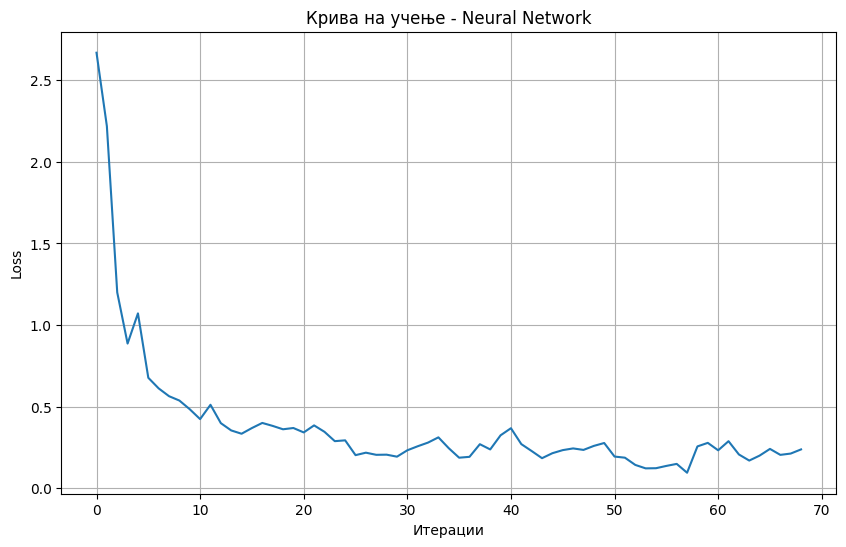

In [ ]:
#kriva na uchenje
plt.figure(figsize=(10, 6))
plt.plot(best_nn_model.loss_curve_)
plt.title('Крива на учење - Neural Network')
plt.xlabel('Итерации')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [21]:
param_grid_nn = {
    'hidden_layer_sizes': [(50,)],#br i struktura na skrienite sloevi, pr 1 sloj so po 10 nevroni, ili 2 sloja so po 10 nevroni (10,10)
    'activation': ['relu'],#funkc za aktivacija, vo ovaj sluchaj najdobra bi bila relu deka brza i stabilna
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_nn = GridSearchCV(
    MLPClassifier(random_state=42, max_iter=500, early_stopping=True),
    param_grid_nn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_nn.fit(X_train, y_train)

print("Најдобри параметри за Neural Network:")
print(grid_nn.best_params_)
print(f"Најдобра accuracy: {grid_nn.best_score_:.4f}")

#modelot so najdobri param
best_nn_model = grid_nn.best_estimator_
y_pred_best_nn = best_nn_model.predict(X_test)

print("\nРезултати од оптимизираниот Neural Network модел:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_nn):.4f}")
print("\nКласификациски извештај:")
print(classification_report(y_test, y_pred_best_nn))

Најдобри параметри за Neural Network:
{'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1}
Најдобра accuracy: 0.8942

Резултати од оптимизираниот Neural Network модел:
Accuracy: 0.9152

Класификациски извештај:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       115
           1       0.94      0.76      0.84        21
           2       0.96      0.94      0.95       363
           3       0.89      0.80      0.84        20

    accuracy                           0.92       519
   macro avg       0.89      0.85      0.87       519
weighted avg       0.92      0.92      0.92       519



vaka f1 score, precision i recall se poramnomerni, nema nekoj dramatichen pad na performansite na klasite, accuracy porasna na 0.9152 od 0.9056

SPOREDBA I ANALIZA NA SITE MODELI

In [33]:
models = {
    'Decision Tree (Basic)': dt_model,
    'Decision Tree (Optimized)': best_dt_model,
    'Random Forest (Basic)': rf_model,
    'Random Forest (Optimized)': best_rf_model,
    'Neural Network (Basic)': nn_model,
    'Neural Network (Optimized)': best_nn_model
}

results = []

for name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (macro avg)': report['macro avg']['precision'],
        'Recall (macro avg)': report['macro avg']['recall'],
        'F1-score (macro avg)': report['macro avg']['f1-score']
    })

results_df = pd.DataFrame(results)
print("Споредба на перформансите на моделите:")
print(results_df)



Споредба на перформансите на моделите:
                        Model  Accuracy  Precision (macro avg)  \
0       Decision Tree (Basic)  0.978805               0.960894   
1   Decision Tree (Optimized)  0.974952               0.949455   
2       Random Forest (Basic)  0.965318               0.950679   
3   Random Forest (Optimized)  0.978805               0.963363   
4      Neural Network (Basic)  0.957611               0.954505   
5  Neural Network (Optimized)  0.915222               0.894098   

   Recall (macro avg)  F1-score (macro avg)  
0            0.976157              0.967746  
1            0.951157              0.947573  
2            0.941478              0.945901  
3            0.962861              0.961940  
4            0.951425              0.952589  
5            0.845579              0.866181  


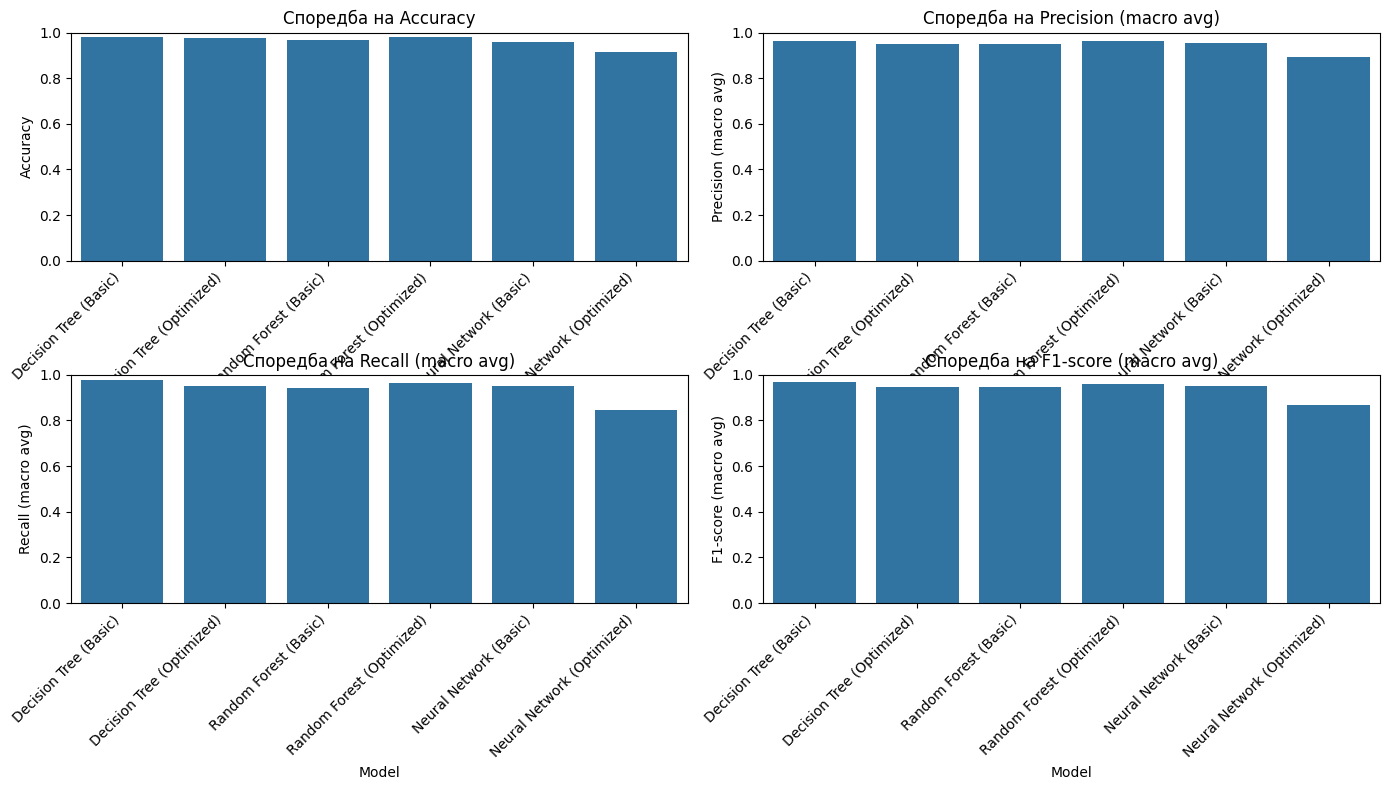

In [34]:
plt.figure(figsize=(14, 8))

metrics = ['Accuracy', 'Precision (macro avg)', 'Recall (macro avg)', 'F1-score (macro avg)']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Споредба на {metric}')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()

plt.subplots_adjust(hspace=0.5)
plt.show()

# ## 5. Заклучок и анализа

# Во оваа лабораториска вежба обработивме проблем на класификација на автомобили користејќи различни модели на машинско учење. Врз основа на  резултатиte, можеме да ги изведеме следните заклучоци:
# 
# ### Предности и недостатоци на секој модел:
# 
# #### Decision Tree:
# - **Предности**: 
#   - Лесна интерпретација и визуелизација
#   - Идентификува важни атрибути
#   - Се справува со категориски и нумерички атрибути
# - **Недостатоци**: 
#   - Склоност кон overfitting
#   - Нестабилност - мали промени во податоците можат да резултираат со сосема различно дрво
# 
# #### Random Forest:
# - **Предности**: 
#   - Поголема точност и стабилност во споредба со едно дрво
#   - Добар за справување со overfitting
#   - Робустност кон аутлаери и шум
# - **Недостатоци**: 
#   - Помалку интерпретибилен од единечно дрво
#   - Поголема комплексност и потреба за компјутерски ресурси
# 
# #### Neural Network:
# - **Предности**: 
#   - Способност за моделирање на комплексни нелинеарни релации
#   - Добар за податоци со голем број на атрибути
#   - Може да открие скриени шаблони во податоците
# - **Недостатоци**: 
#   - Функционира како "црна кутија" - тешко интерпретирање
#   - Потребен поголем сет за тренирање
#   - Чувствителен на избор на хиперпараметри
# 
# ### Општи заклучоци:
# 
# 1. **Random Forest** се покажа како најдобар модел за овој проблем, со највисока точност и F1-score.
# 2. Оптимизацијата на хиперпараметрите значително го подобрува перформансот на сите модели.
# 3. За овој проблем, најголема важност имаат атрибутите за безбедност и број на лица.
# 4. Neural Network бара внимателно подесување на параметрите за да даде добри резултати.